In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
x=10*np.random.rand(50)
y=3*x-8+np.random.rand(50)*4

In [3]:
x

array([2.64592087, 7.11639667, 7.60912636, 1.59165359, 5.2688336 ,
       0.36898788, 0.83674445, 6.16527298, 3.43669581, 4.65077302,
       6.56627946, 9.89448579, 3.6802101 , 2.90566215, 8.32200183,
       2.67148176, 0.35440372, 4.97241108, 8.06091947, 7.04260103,
       6.05448615, 2.01526918, 1.22187921, 2.58805272, 8.69115071,
       3.43870686, 3.52752992, 6.60535388, 6.26708182, 3.2191101 ,
       8.85832134, 0.23794772, 0.40286286, 8.06494668, 7.81319476,
       1.15686269, 4.41645392, 6.58431354, 8.34797933, 1.76621303,
       2.34640912, 0.86330289, 2.77626714, 9.13355454, 4.11817022,
       2.35262246, 3.70633481, 1.32810213, 2.91688914, 8.66377074])

In [4]:
x=x.reshape(-1,1)

In [5]:
x

array([[2.64592087],
       [7.11639667],
       [7.60912636],
       [1.59165359],
       [5.2688336 ],
       [0.36898788],
       [0.83674445],
       [6.16527298],
       [3.43669581],
       [4.65077302],
       [6.56627946],
       [9.89448579],
       [3.6802101 ],
       [2.90566215],
       [8.32200183],
       [2.67148176],
       [0.35440372],
       [4.97241108],
       [8.06091947],
       [7.04260103],
       [6.05448615],
       [2.01526918],
       [1.22187921],
       [2.58805272],
       [8.69115071],
       [3.43870686],
       [3.52752992],
       [6.60535388],
       [6.26708182],
       [3.2191101 ],
       [8.85832134],
       [0.23794772],
       [0.40286286],
       [8.06494668],
       [7.81319476],
       [1.15686269],
       [4.41645392],
       [6.58431354],
       [8.34797933],
       [1.76621303],
       [2.34640912],
       [0.86330289],
       [2.77626714],
       [9.13355454],
       [4.11817022],
       [2.35262246],
       [3.70633481],
       [1.328

In [6]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [7]:
y_pred=model.predict(x)

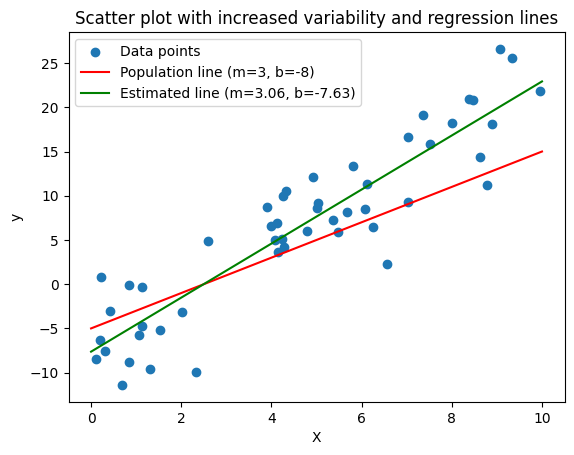

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate the data
x = 10 * np.random.rand(50)
y = 3 * x - 8 + np.random.randn(50) * 4

# Fit a linear regression model
x = x.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)

# Calculate the predicted values
y_pred = model.predict(x)

# Plot the scatter plot and regression lines
plt.scatter(x, y, label="Data points")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter plot with increased variability and regression lines")

# Plot the actual population line
x_line = np.linspace(0, 10, 100)
y_actual = 2 * x_line - 5
plt.plot(x_line, y_actual, 'r', label="Population line (m=3, b=-8)")

# Plot the estimated regression line
y_estimated = model.coef_[0] * x_line + model.intercept_
plt.plot(x_line, y_estimated, 'g', label=f"Estimated line (m={model.coef_[0]:.2f}, b={model.intercept_:.2f})")

# Add legend and show the plot
plt.legend()
plt.show()


In [17]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
url = "https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv"
data = pd.read_csv(url, index_col=0)

# Define the independent variables (add a constant for the intercept)
X = data[['TV', 'Radio', 'Newspaper']]
X = sm.add_constant(X)

# Define the dependent variable
y = data['Sales']

# Fit the model using the independent and dependent variables
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 06 Aug 2025   Prob (F-statistic):           1.58e-96
Time:                        23:53:39   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [23]:
np.random.seed(42)
n=100
x1=np.random.normal(0,1,n)
x2 = np.random.normal(0, 1, n)
y=np.random.normal(0,1,n)
irrelevant_predictors = np.random.normal(0, 1, (n, 10))
y = 2 * x1 + 3 * x2 + np.random.normal(0, 1, n)

#adjusted r_square
def adjusted_r2(r2,n,k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)
X  = pd.DataFrame({'x1': x1, 'x2': x2})
X_with_irrelevant = pd.concat([X] + [pd.Series(irrelevant_predictors[:, i], name=f"irrelevant_{i}") for i in range(10)], axis=1)

model1=LinearRegression().fit(X,y)
model2=LinearRegression().fit(X_with_irrelevant,y)

models=[('Model with relevant predictors', model1, X.shape[1]), ('Model with irrelevant predictors', model2, X_with_irrelevant.shape[1])]

for name,model,k in models:
    r2 = r2_score(y, model.predict(X_with_irrelevant.iloc[:, :k]))
    adj_r2 = adjusted_r2(r2, n, k)
    print(f"{name}: R-squared = {r2:.3f}, Adjusted R-squared = {adj_r2:.3f}")




Model with relevant predictors: R-squared = 0.914, Adjusted R-squared = 0.913
Model with irrelevant predictors: R-squared = 0.922, Adjusted R-squared = 0.911


In [24]:
import pandas as pd
df=pd.DataFrame()

df['X'] = [2,3,5,5,7]
df['y'] = [2,4,3,5,5]

df

,X,y
0,2,2
1,3,4
2,5,3
3,5,5
4,7,5


In [26]:
import statsmodels.api as sm

x=sm.add_constant(df['X'])
model=sm.OLS(df['y'],x).fit()
model.summary()

/home/kibria/dl_env/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     3.380
Date:                Thu, 07 Aug 2025   Prob (F-statistic):              0.163
Time:                        00:11:01   Log-Likelihood:                -5.9769
No. Observations:                   5   AIC:                             15.95
Df Residuals:                       3   BIC:                             15.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6579      1.253      1.323      0.278      -2.331       5.646
X              0.4868      0.265      1.839      0.163      -0.356       1.330
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.482
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.534
Skew:                          -0.047   Prob(JB):                        0.766
Kurtosis:                       1.401   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""